In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from os import listdir
import json

In [4]:
listdir("C:/Users/LEGEND/Desktop/BitCoin/Dataset/")

['BTCUSDT_690000000_5000000.json', 'ETHBTC_240000000_5000000.json']

In [5]:
#Setting global path to Dataset
INPUT_PATH = "C:/Users/LEGEND/Desktop/BitCoin/Dataset/"

In [6]:
#Reading json file and formating it as a Pandas DataFrame
df = pd.read_json(INPUT_PATH + 'BTCUSDT_690000000_5000000.json',convert_dates = ['time'] )

In [7]:
#Check if DataFrame contains the correct format of data as in json file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 7 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   price         float64       
 2   qty           float64       
 3   quoteQty      float64       
 4   time          datetime64[ns]
 5   isBuyerMaker  bool          
 6   isBestMatch   bool          
dtypes: bool(2), datetime64[ns](1), float64(3), int64(1)
memory usage: 200.3 MB


In [8]:
#Having a Look at data
df.head()

,id,price,qty,quoteQty,time,isBuyerMaker,isBestMatch
0,690000000,51310.61,0.000612,31.402093,2021-03-07 23:52:05.150,False,True
1,690000001,51310.61,0.000309,15.854978,2021-03-07 23:52:05.150,False,True
2,690000002,51310.86,0.000243,12.468539,2021-03-07 23:52:05.150,False,True
3,690000003,51320.00,0.000086,4.413520,2021-03-07 23:52:05.150,False,True
4,690000004,51320.43,0.000301,15.447449,2021-03-07 23:52:05.150,False,True


In [9]:
#We should focus only on time and price columns, the other column's make no difference for forecasting
# df['price'] = df['price'].astype(np.uint16)
dfbtc = df[['id','time','price']]

In [10]:
#Looking for missing values
print(dfbtc.isnull().sum())

id       0
time     0
price    0
dtype: int64


In [11]:
dfbtc.tail()

,id,time,price
4999995,694999995,2021-03-10 07:22:10.892,54099.96
4999996,694999996,2021-03-10 07:22:10.893,54100.00
4999997,694999997,2021-03-10 07:22:10.904,54100.00
4999998,694999998,2021-03-10 07:22:10.913,54100.00
4999999,694999999,2021-03-10 07:22:10.913,54100.00


In [12]:
dfbtc.describe()

,id,price
count,5.000000e+06,5.000000e+06
mean,6.925000e+08,5.267481e+04
std,1.443376e+06,1.728043e+03
min,6.900000e+08,4.927467e+04
25%,6.912500e+08,5.089968e+04
50%,6.925000e+08,5.357490e+04
75%,6.937500e+08,5.408717e+04
max,6.950000e+08,5.581309e+04


In [13]:
#Converting to numpy arrays to visualize data
b0 = dfbtc.iloc[:, 1].to_numpy()
b2 = dfbtc.iloc[:, 2].to_numpy()


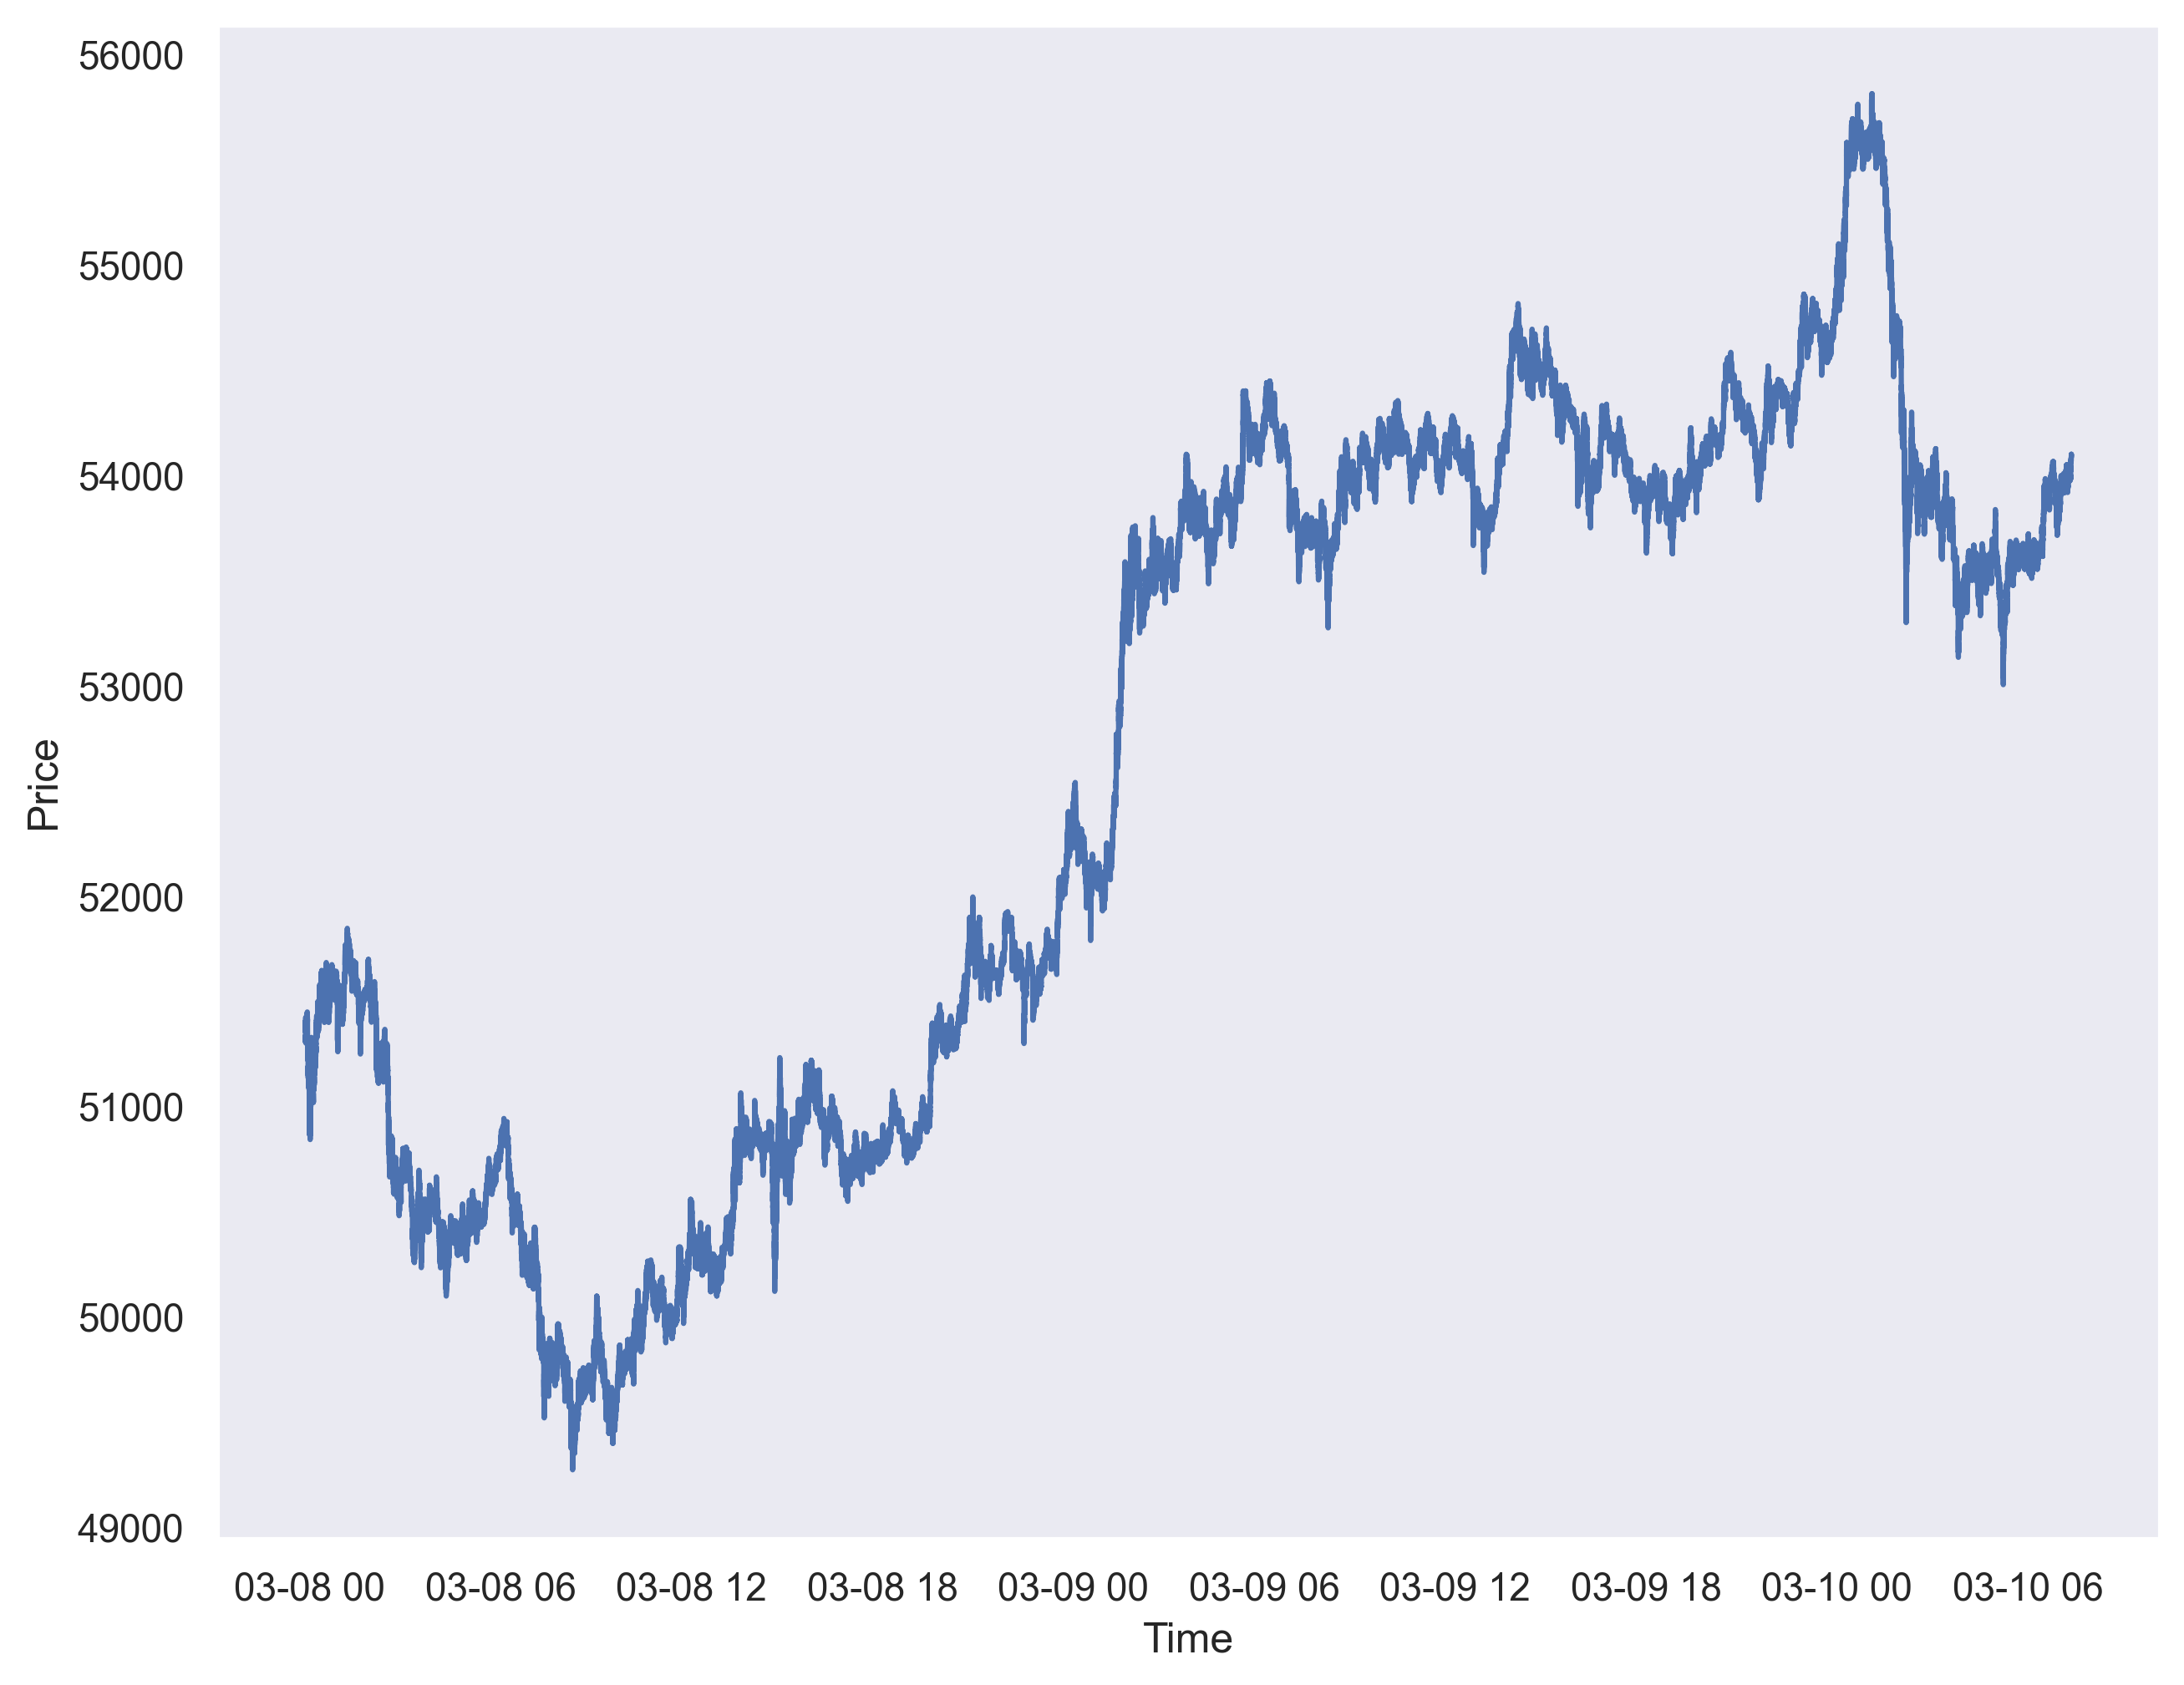

In [14]:
#Ploting Data to graphical chart
plt.figure(num=None, figsize=(10, 8), dpi=300, facecolor='w', edgecolor='k')
plt.plot(b0, b2, "-")
plt.xlabel("Time")
plt.ylabel("Price")
plt.grid(False)

In [15]:
#Too much Data to visualize, 5.000.000 lines of data with the precision of milliseconds,
# an approach that is proposed is to convert data dates to minutes precision and prices to mean value when grouping by date

# Changing datetime format to minutes precision
dfbtc.loc[:, 'time'] = dfbtc.time.dt.floor('T').dt.strftime("%Y-%m-%d %H:%M")

C:\Users\LEGEND\Anaconda3\envs\TF-GPU\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [16]:
#Grouping prices by a commun datetime(minute) using the mean value approach
dfbtc_min = dfbtc.groupby("time",as_index = False).agg({'price': 'mean'})

In [17]:
#Adding a column named date to convert time object column to datatype datetime64[ns] and to index the dataframe
dfbtc_min['date'] = pd.to_datetime(dfbtc_min['time'])
dfbtc_min=dfbtc_min.set_index('date').asfreq('T', fill_value=0)

In [18]:
#Having a look at we made so far
dfbtc_min.head()

,time,price
date,,
2021-03-07 23:52:00,2021-03-07 23:52,51371.094285
2021-03-07 23:53:00,2021-03-07 23:53,51356.279396
2021-03-07 23:54:00,2021-03-07 23:54,51410.314163
2021-03-07 23:55:00,2021-03-07 23:55,51428.881489
2021-03-07 23:56:00,2021-03-07 23:56,51279.094950


In [19]:
#Converting data to numpy array to be visualized
bmin0 = dfbtc_min.index.values
bmin2 = dfbtc_min.iloc[:, 1].to_numpy()

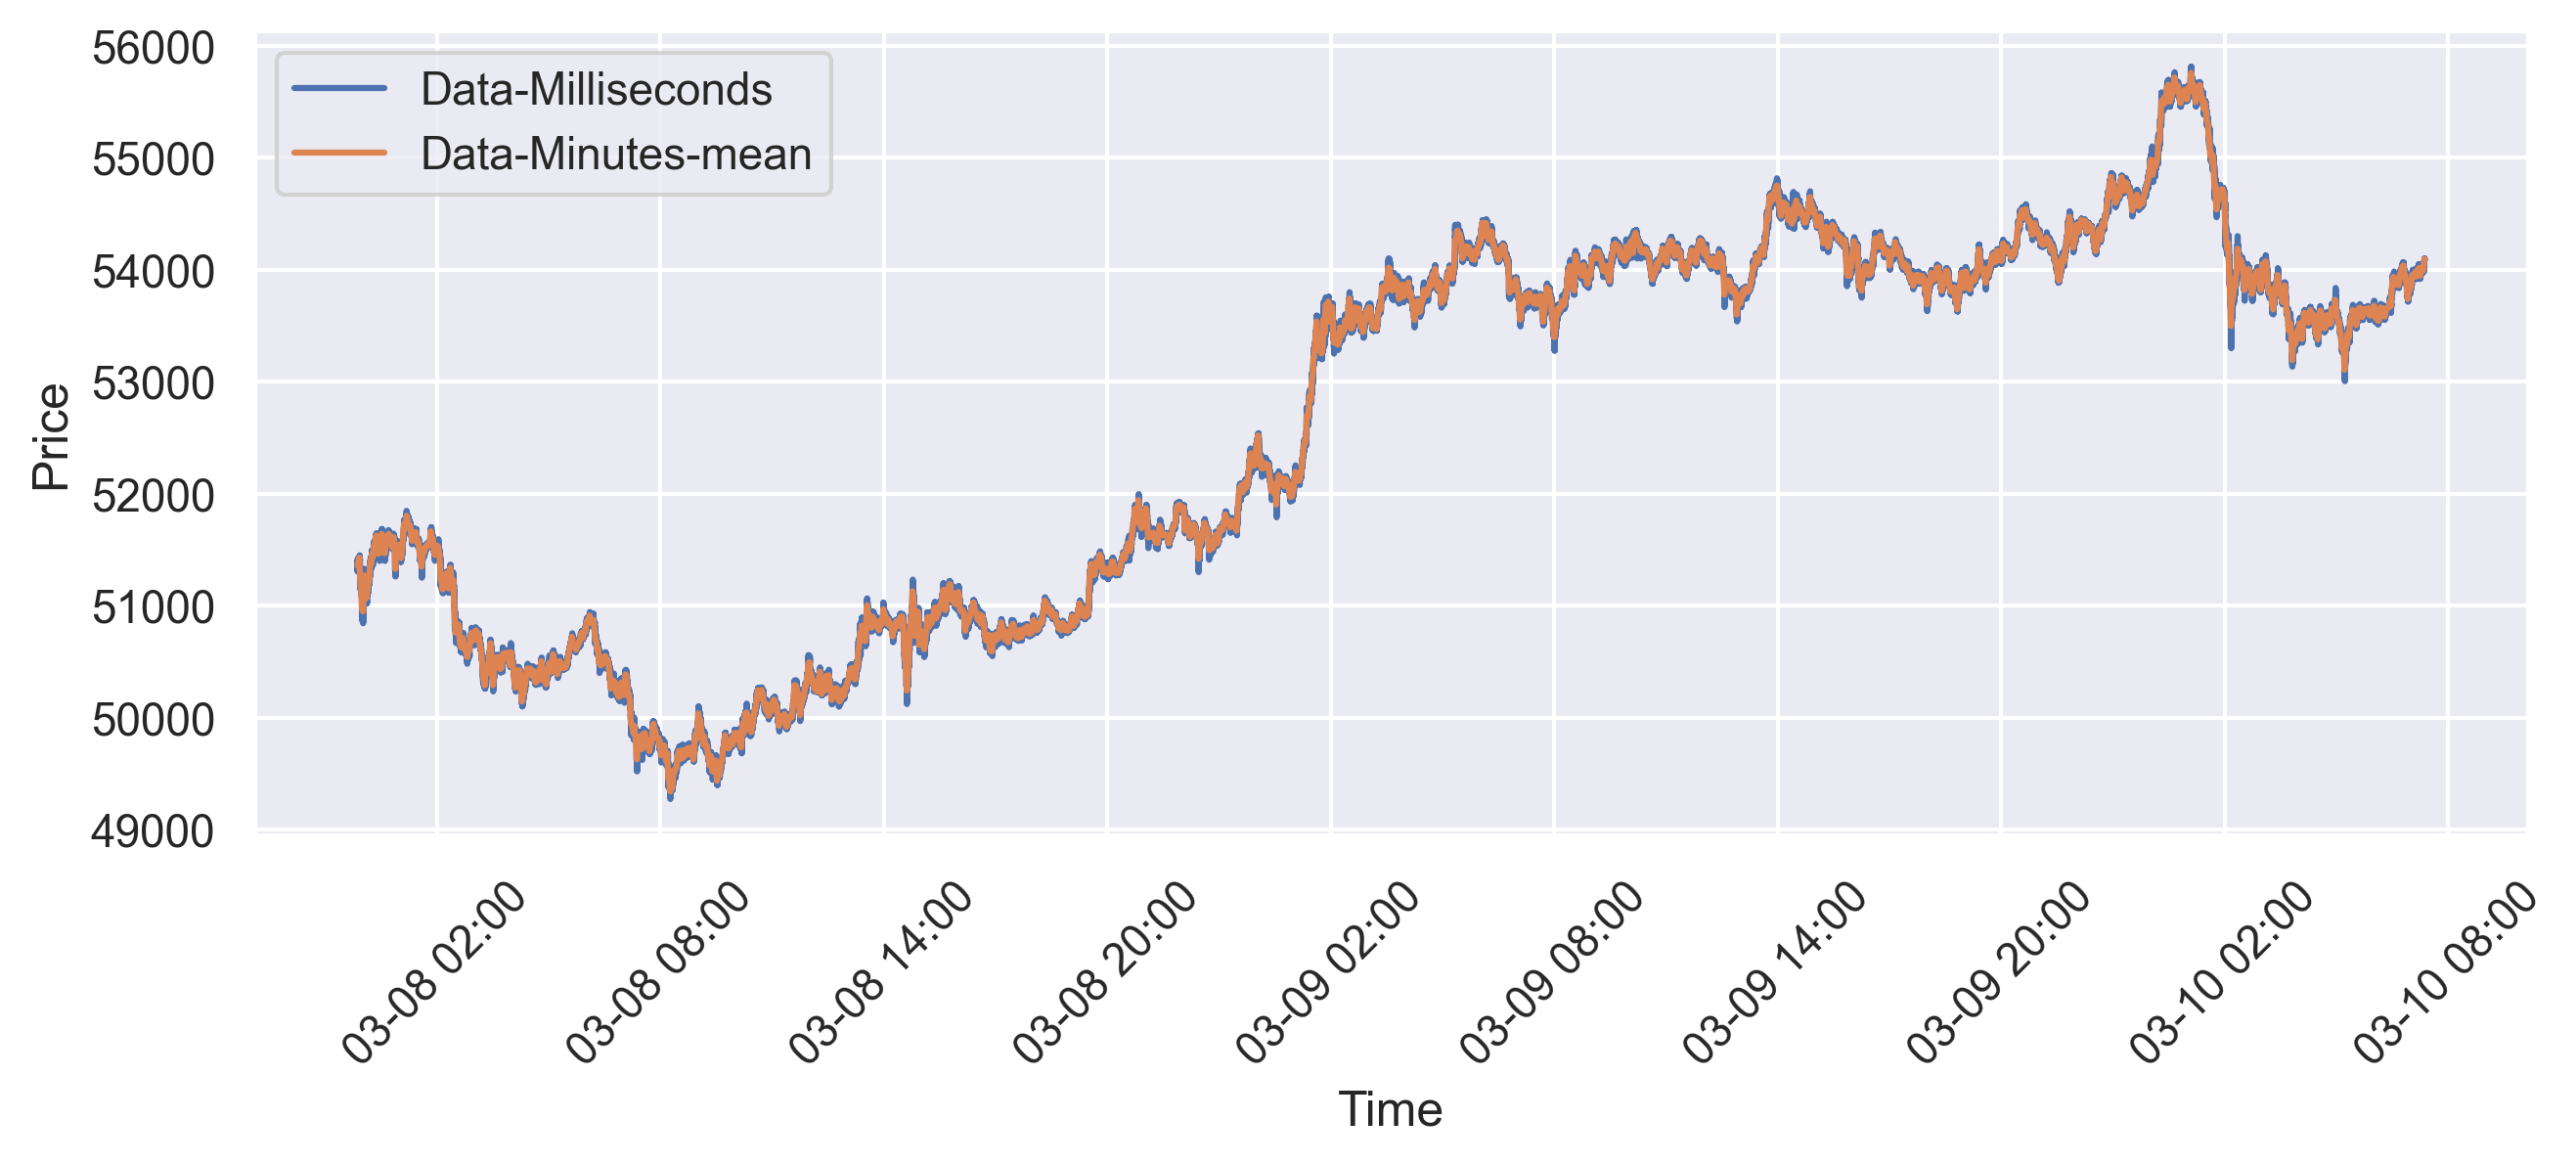

In [20]:
#Side by side comparison between Original dataset(Milliseconds) and converted data(Minutes) with the approach of mean values

import matplotlib.ticker as ticker
from matplotlib.dates import HourLocator
import matplotlib.dates as mdates

plt.figure(figsize=(10, 8), dpi=300, facecolor='w', edgecolor='k')

ax = plt.subplot(2, 1, 1)
ax.xaxis.set_major_locator(HourLocator(byhour=None, interval=6, tz=None))
ax.plot(b0, b2, linestyle='-', label='Data-Milliseconds')
ax.set_xlabel('Time')
ax.set_ylabel('Price')
myFmt = mdates.DateFormatter('%m-%d %H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.tick_params(axis='x', labelrotation=45 )
ax.grid(True)
leg = ax.legend()

ax = plt.subplot(2, 1, 1)
ax.xaxis.set_major_locator(HourLocator(byhour=None, interval=6, tz=None))
ax.plot(bmin0, bmin2, linestyle='-',label='Data-Minutes-mean')
ax.set_xlabel('Time')
ax.set_ylabel('Price')
myFmt = mdates.DateFormatter('%m-%d %H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.tick_params(axis='x', labelrotation=45 )
ax.grid(True)
leg = ax.legend()

plt.show()

In [21]:
# from statsmodels.tsa.seasonal import seasonal_decompose
# def decompose(series):
#     plt.figure(figsize = (14,7))
#     seasonal_decompose(series, model="multiplicative", period=1).plot()
#     plt.show()    
    
# def plots(series):
#     plt.figure(figsize = (10,6))
#     sns.lineplot(data = series, color = 'blue', label = 'observed line plot')
#     sns.lineplot(data = series.rolling(window = 12).mean(), color = 'green', label = 'rolling mean, window -12')
#     sns.lineplot(data = series.rolling(window = 12).std(), color = 'black', label = 'std deviation, window -12')

In [22]:
# to_decompose = dfbtc_min[["price"]]
# decompose(to_decompose)
# plots(to_decompose)

In [23]:
#Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [24]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(prices):
    result=adfuller(prices, maxlag=20)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [25]:
adfuller_test(dfbtc_min['price'].values)

ADF Test Statistic : -0.8387193748058801
p-value : 0.807483199959628
#Lags Used : 2
Number of Observations Used : 3328
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [26]:
#Making approach with the log
dfbtc_min["logprice"] = np.log(dfbtc_min["price"])

In [27]:
#Data representing a non stationary time series, p-value>0.05
#Solution : Differencing (Prices First Differencing)

# dfbtc_min['diffprice'] = dfbtc_min['price'] - dfbtc_min['price'].shift(1)
dfbtc_min['logdiffprice'] = dfbtc_min['logprice'] - dfbtc_min['logprice'].shift(1)

In [28]:
#Differencing with shift(1) means to substraction between two values of the column price, Y(t) and Y(t-1), that's why the first
# value appears to be NaN, and we should drop it before any other calculation
dfbtc_min.head()

,time,price,logprice,logdiffprice
date,,,,
2021-03-07 23:52:00,2021-03-07 23:52,51371.094285,10.846831,NaN
2021-03-07 23:53:00,2021-03-07 23:53,51356.279396,10.846542,-0.000288
2021-03-07 23:54:00,2021-03-07 23:54,51410.314163,10.847594,0.001052
2021-03-07 23:55:00,2021-03-07 23:55,51428.881489,10.847955,0.000361
2021-03-07 23:56:00,2021-03-07 23:56,51279.094950,10.845038,-0.002917


In [29]:
#Converting dataset to Numpy array
bdlog0 = dfbtc_min.index.values
bdlog2 = dfbtc_min.iloc[:, 3].to_numpy()

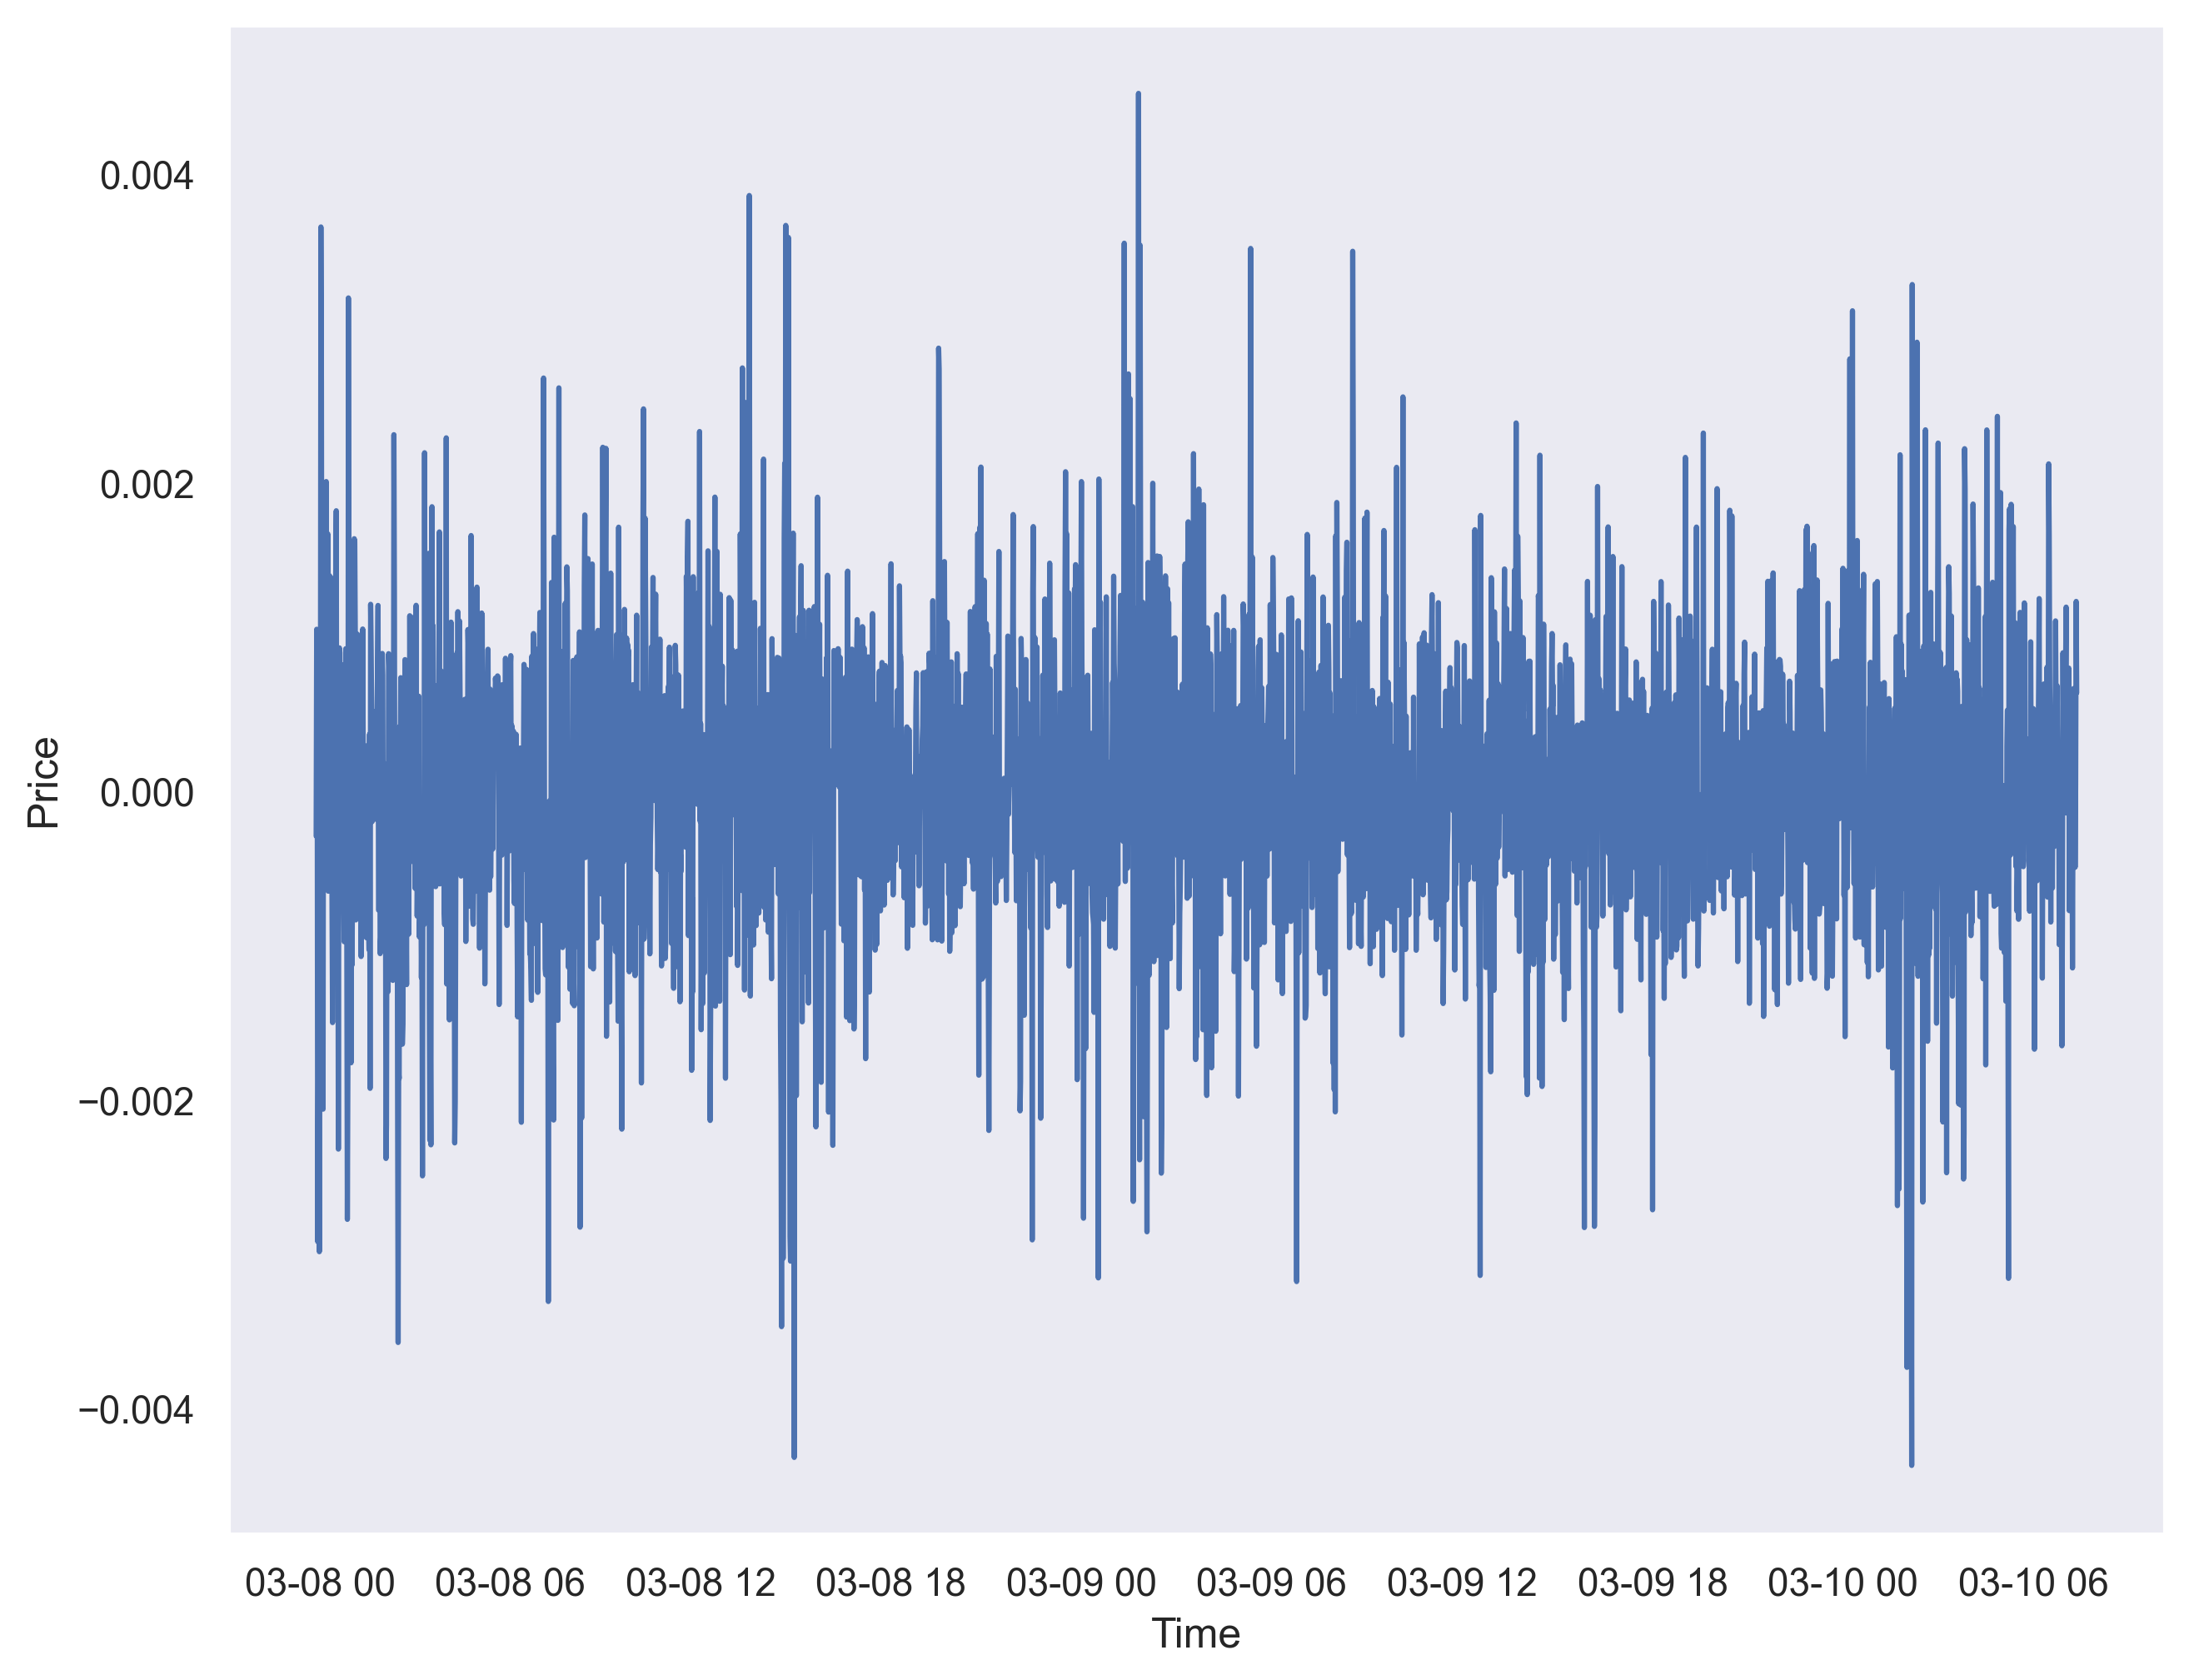

In [30]:
#Ploting the data of the new column logdiffprice to visualize the time series behavior
plt.figure(num=None, figsize=(10, 8), dpi=300, facecolor='w', edgecolor='k')
plt.plot(bdlog0, bdlog2, "-")
plt.xlabel("Time")
plt.ylabel("Price")
plt.grid(False)

In [31]:
#From the plot we can see clearly that Data is stationary, no trend an no seasonality
#a stationarity test should be done, just to make sure
adfuller_test(dfbtc_min['logdiffprice'].dropna())

ADF Test Statistic : -37.951560313509056
p-value : 0.0
#Lags Used : 1
Number of Observations Used : 3328
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


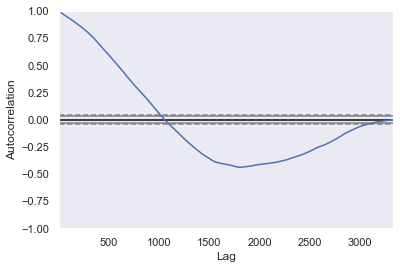

In [32]:
#lags should be useful to know how much of previous days(minutes-hours) we have to consider if we want to predict today's values
#that can only be done by the autocorrelation plot

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(dfbtc_min['price'])
plt.show()

In [33]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

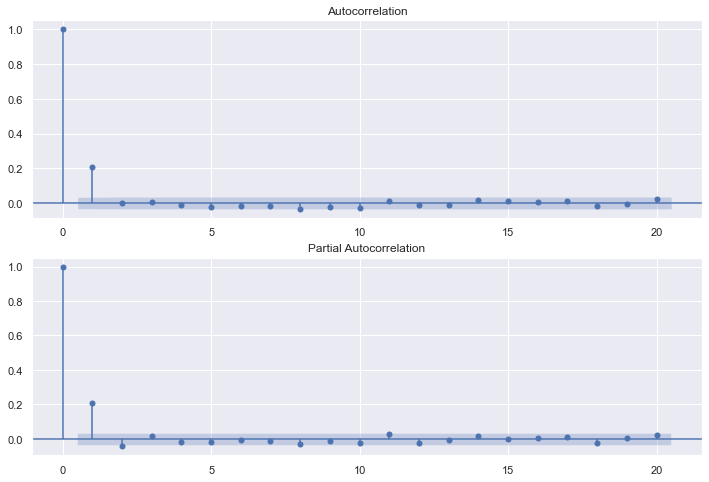

In [34]:
# p,d,q
#p AR model lags 
#d differencing 
#q MA lags

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(dfbtc_min['logdiffprice'].iloc[1:],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(dfbtc_min['logdiffprice'].iloc[1:],lags=20,ax=ax2)

In [33]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [35]:
import statsmodels.api as sm

In [36]:
import time

start_time=time.time()

model=sm.tsa.statespace.SARIMAX(dfbtc_min['price'],order=(2, 1, 2),seasonal_order=(2,1,2,60))
results=model.fit()

print('Training took {} seconds'.format(time.time()-start_time))

Training took 2178.0406742095947 seconds


<AxesSubplot:xlabel='date'>

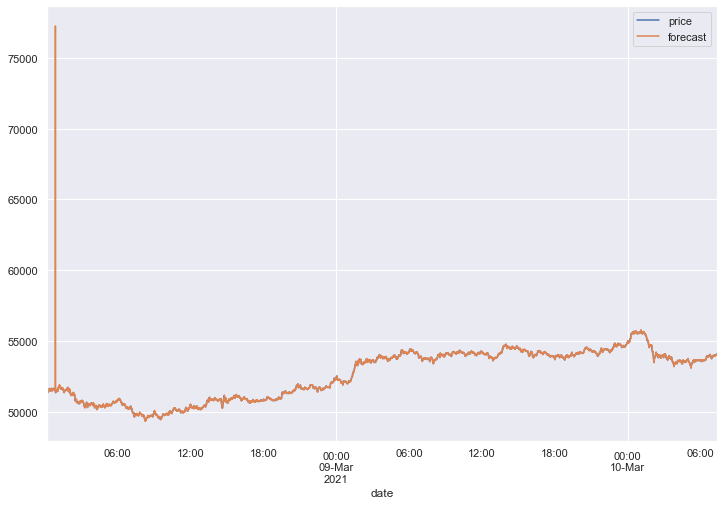

In [37]:
dfbtc_min['forecast']=results.fittedvalues
dfbtc_min[['price','forecast']][20:].plot(figsize=(12,8))

In [39]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# rms = sqrt(mean_squared_error(dfbtc_min['price'], dfbtc_min['forecast4']))
# print(rms)

In [40]:
#To predict the next following values, we add time offsets to a dataframe in order to be concatenated with original data
#in this case we will be predicting the next ten 10 hours (from 2021-03-10 07:22:00 to 2021-03-10 15:21:00 )
from pandas.tseries.offsets import DateOffset
future_dates=[dfbtc_min.index[-1]+ DateOffset(minutes=x)for x in range(0,600)]

In [41]:
future_datest_df = pd.DataFrame(index=future_dates[1:],columns=dfbtc_min.columns)

In [42]:
future_datest_df.tail()

,time,price,logprice,logdiffprice,forecast
2021-03-10 17:17:00,NaN,NaN,NaN,NaN,NaN
2021-03-10 17:18:00,NaN,NaN,NaN,NaN,NaN
2021-03-10 17:19:00,NaN,NaN,NaN,NaN,NaN
2021-03-10 17:20:00,NaN,NaN,NaN,NaN,NaN
2021-03-10 17:21:00,NaN,NaN,NaN,NaN,NaN


In [43]:
future_df=pd.concat([dfbtc_min,future_datest_df])

In [44]:
future_df['forecast'] = results.predict(start = 2000, end = 3930, dynamic= True)

<AxesSubplot:>

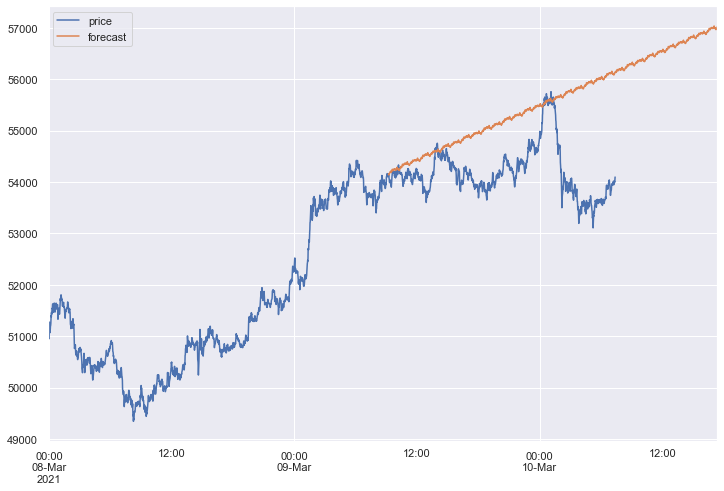

In [45]:
#Poor Results with Arima, Changing Strategy to another Algorithm "Holt's Winter"
future_df[['price', 'forecast']].plot(figsize=(12, 8))

In [36]:
#Making new dataset for our algorithm
train = dfbtc_min[:2500]
test = dfbtc_min[2500:]

C:\Users\LEGEND\Anaconda3\envs\TF-GPU\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\LEGEND\Anaconda3\envs\TF-GPU\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


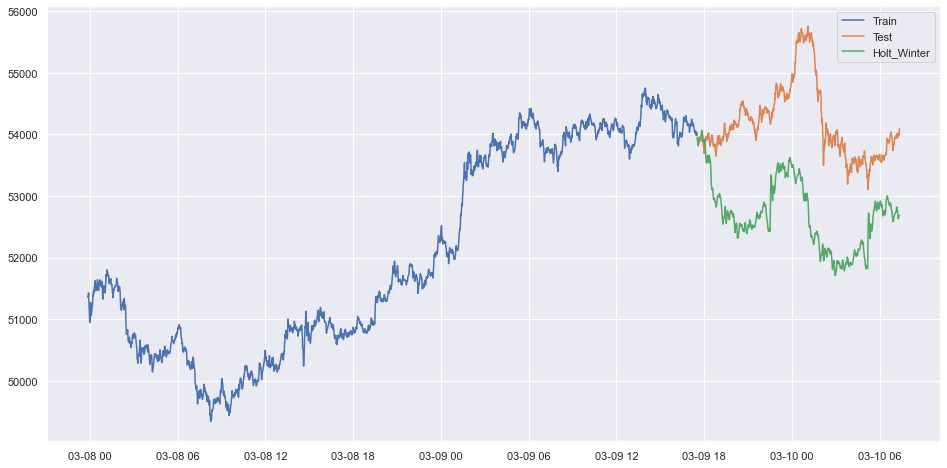

In [38]:
#Good prediction compared to ARIMA model, but not enogh to be precise, Trying with RNNs
from statsmodels.tsa.holtwinters import ExponentialSmoothing

y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['price']) ,seasonal_periods=400 ,trend='add', seasonal='mul',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['price'], label='Train')
plt.plot(test['price'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [46]:
import torch
import torch.nn as nn
import torch.utils 
import torch.utils.data
from torch.autograd import Variable
import os
from datetime import datetime
import pandas
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [93]:
dftorch = pd.DataFrame(dfbtc_min[['price']].values,columns={"price"})

In [94]:
print(dftorch.shape)
dftorch

(3331, 1)


,price
0,51371.094285
1,51356.279396
2,51410.314163
3,51428.881489
4,51279.094950
...,...
3326,54017.813208
3327,53991.334311
3328,53993.502582
3329,54060.066409


In [95]:
test_days = 800
numdays=94 # number of minutes to look back
df_train= dftorch[:len(dftorch)-test_days]
df_test= dftorch[len(dftorch)-test_days:]
training_set = df_train.values
test_set = df_test.values
transformer= MinMaxScaler().fit(training_set)
training_set =transformer.transform(training_set)
test_set = df_test.values
test_set = transformer.transform(test_set)

x_train=[];y_train=[];
x_test=[];y_test=[];
for i in range(len(training_set)-numdays):
    x_train.append(training_set[i:(i+numdays)])
    y_train.append(training_set[i+numdays])
for i in range(len(test_set)-numdays):
    x_test.append(test_set[i:(i+numdays)])
    y_test.append(test_set[i+numdays])
x_train=torch.from_numpy(np.array(x_train).squeeze().astype(np.float32))
y_train=torch.from_numpy(np.array(y_train).astype(np.float32))
x_test=torch.from_numpy(np.array(x_test).squeeze().astype(np.float32))
#y_test=torch.from_numpy(np.array(y_test).astype(np.float32))

print(x_train.shape, x_test.shape)

torch.Size([2437, 94]) torch.Size([706, 94])


In [99]:
class MyModel(torch.nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        # using a GRU (Gated Recurrent Unit), also try and LSTM
        self.rnn1 = nn.GRU(input_size=94, hidden_size=8, num_layers=1)
        self.dropout = nn.Dropout(p=0.20)
        self.dense1 = nn.Linear(8, 4)
        self.dense2 = nn.Linear(4, 1)

    def forward(self, x, hidden):
        x_batch = x.view(len(x), 1, -1)
        x_r, hidden = self.rnn1(x_batch, hidden)
        x_d = self.dropout(x_r)
        x_l = self.dense1(x_d)
        x_l2 = self.dense2(x_l)
        return x_l2, hidden

    def init_hidden(self):
        return Variable(torch.randn(1, 1, 8))

In [100]:
model = MyModel()
lossfn = nn.MSELoss()
optimizer = torch.optim.Adadelta(model.parameters(), lr=0.1)
initial_hidden = model.init_hidden()
print(model)

MyModel(
  (rnn1): GRU(94, 8)
  (dropout): Dropout(p=0.2, inplace=False)
  (dense1): Linear(in_features=8, out_features=4, bias=True)
  (dense2): Linear(in_features=4, out_features=1, bias=True)
)


In [102]:
for i in range(700):
    model.zero_grad()
    hidden=initial_hidden
    out, hidden = model(x_train, hidden)
    loss = lossfn(out.view(-1,1), y_train)
    if i % 20 == 0:
        print('{:%H:%M:%S} epoch {} loss: {}'.format(datetime.now(), i, loss.data.numpy().tolist()), flush=True)
    loss.backward()
    optimizer.step()

04:35:13 epoch 0 loss: 0.01805903948843479
04:35:25 epoch 20 loss: 0.014521922916173935
04:35:37 epoch 40 loss: 0.01264218334108591
04:35:49 epoch 60 loss: 0.012035038322210312
04:36:01 epoch 80 loss: 0.00999417807906866
04:36:13 epoch 100 loss: 0.010071607306599617
04:36:24 epoch 120 loss: 0.00949389673769474
04:36:36 epoch 140 loss: 0.00923718698322773
04:36:48 epoch 160 loss: 0.008914045989513397
04:36:59 epoch 180 loss: 0.008648180402815342
04:37:10 epoch 200 loss: 0.008610507473349571
04:37:22 epoch 220 loss: 0.008020712062716484
04:37:35 epoch 240 loss: 0.008038432337343693
04:37:48 epoch 260 loss: 0.008214237168431282
04:38:03 epoch 280 loss: 0.007463359739631414
04:38:16 epoch 300 loss: 0.007899974472820759
04:38:28 epoch 320 loss: 0.0077168201096355915
04:38:40 epoch 340 loss: 0.0078072138130664825
04:38:51 epoch 360 loss: 0.00752246892079711
04:39:01 epoch 380 loss: 0.007378675043582916
04:39:12 epoch 400 loss: 0.006990261375904083
04:39:23 epoch 420 loss: 0.00780626758933067

In [103]:
# Training set
pred, new_hidden = model(x_train, initial_hidden)
prices=transformer.inverse_transform(pred.detach().numpy().reshape(-1,1))
actual=transformer.inverse_transform(y_train.numpy().reshape(-1,1))

<ipython-input-104-06ef01a54987>:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


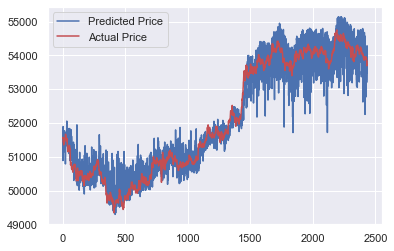

In [104]:
#Prediction comparison to actual price, training phase
import matplotlib.pyplot as plt
plt.plot(range(prices.shape[0]-2), prices[2:], label='Predicted Price')
plt.plot(range(prices.shape[0]-2), actual[2:], 'r', label='Actual Price')
plt.legend()
plt.show()

In [105]:
# Training set
pred, new_hidden = model(x_test, initial_hidden)
prices=transformer.inverse_transform(pred.detach().numpy().reshape(-1,1))
actual=transformer.inverse_transform(y_test)

<ipython-input-106-06ef01a54987>:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


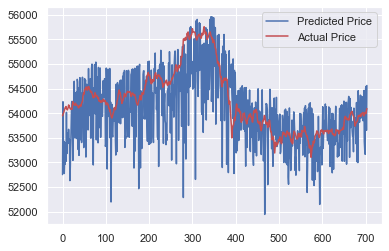

In [106]:
#Prediction comparison to actual price, test phase
import matplotlib.pyplot as plt
plt.plot(range(prices.shape[0]-2), prices[2:], label='Predicted Price')
plt.plot(range(prices.shape[0]-2), actual[2:], 'r', label='Actual Price')
plt.legend()
plt.show()

In [ ]:
#RNNs prove to be better than ARIMA & Holt's Winter Alogrithms, with more data and more LSTM nodes maybe we can predict 
#more precise values, it would be nice to give it a try, and next time we'll be using the gpu assisted torch